# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=100, n_features=4, noise=5)

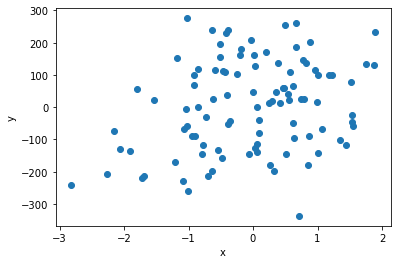

In [20]:
# visualize the data
plt.scatter(x[:,0],y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
#modelling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [11]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x,y,cv=5)
print("Cross validation score=> ",scores)

Cross validation score=>  [0.99894161 0.99867939 0.99718361 0.99783785 0.99795455]


In [12]:
#evaluating the model
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, mean_absolute_error as mae
print("Mean squared error: ",mse(y_test,y_pred))
print("Mean absolute error: ",mae(y_test,y_pred))
print("R2 score: ",r2(y_test,y_pred))

Mean squared error:  21.884579007219696
Mean absolute error:  4.029493916665644
R2 score:  0.9977229582388596


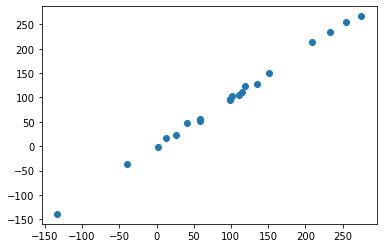

In [16]:
plt.scatter(y_test,y_pred)

# HYPERTUNING

In [18]:
from sklearn.model_selection import GridSearchCV as gsv

In [19]:
grid_params = [
    {'fit_intercept':['True'], 'normalize':['True']},
    {'fit_intercept':['True'], 'normalize':['False']},
]
grid_model = gsv(model, grid_params, cv=5)

In [21]:
grid_model.fit(x_train,y_train)
#prediction
grid_pred = grid_model.predict(x_test)
#cross validation
grid_scores = cross_val_score(grid_model,x,y,cv=5)
print("Cross validation score=> ",grid_scores)

Cross validation score=>  [0.99894161 0.99867939 0.99718361 0.99783785 0.99795455]


In [22]:
# evaluating the model
print("Mean squared error: ",mse(y_test,grid_pred))
print("Mean absolute error: ",mae(y_test,grid_pred))
print("R2 score: ",r2(y_test,grid_pred))

Mean squared error:  21.884579007219454
Mean absolute error:  4.02949391666562
R2 score:  0.9977229582388596


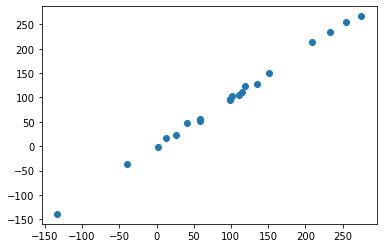

In [24]:
# visualize the data
plt.scatter(y_test,grid_pred)